In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, neighbors, datasets
from sklearn.cluster import KMeans
from sklearn import cluster
%matplotlib inline

In [51]:
flowers = pd.read_csv('iris_data.txt',",",header=None)

In [52]:
flowers.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
flowers

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [54]:
flowers.columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']

In [55]:
flowers

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [56]:
def scatter_plotter_3group(data_set,attribute1,attribute2, group1,group2,group3):
    data=data_set.groupby('Species')
    graph=data.get_group(group1).plot(kind='scatter', x=attribute1, y=attribute2,c='Blue', label=group1, figsize=(12,8));
    data.get_group(group2).plot(kind='scatter', x=attribute1, y=attribute2,c='Green',label=group2,ax=graph);
    data.get_group(group3).plot(kind='scatter', x=attribute1, y=attribute2,c='Red', label=group3,ax=graph);
    graph.yaxis.tick_left()
    graph.xaxis.tick_bottom()
    plt.title(attribute2 + ' vs. ' + attribute1)
    plt.show()

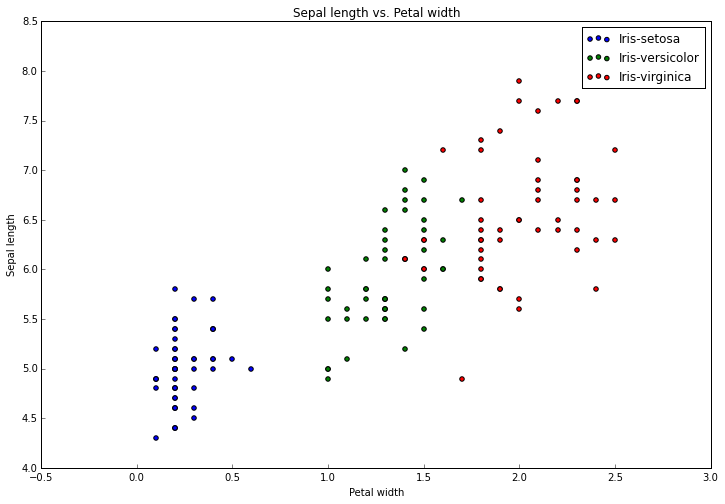

In [57]:
scatter_plotter_3group(flowers,'Petal width','Sepal length', 'Iris-setosa','Iris-versicolor','Iris-virginica')

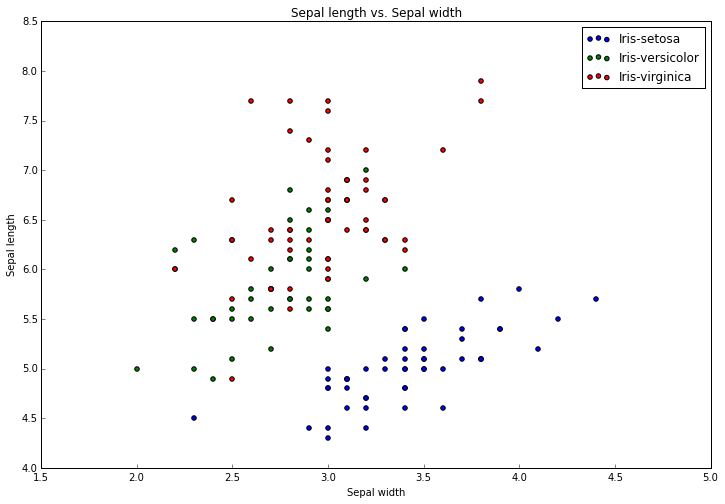

In [58]:
scatter_plotter_3group(flowers,'Sepal width','Sepal length', 'Iris-setosa','Iris-versicolor','Iris-virginica')

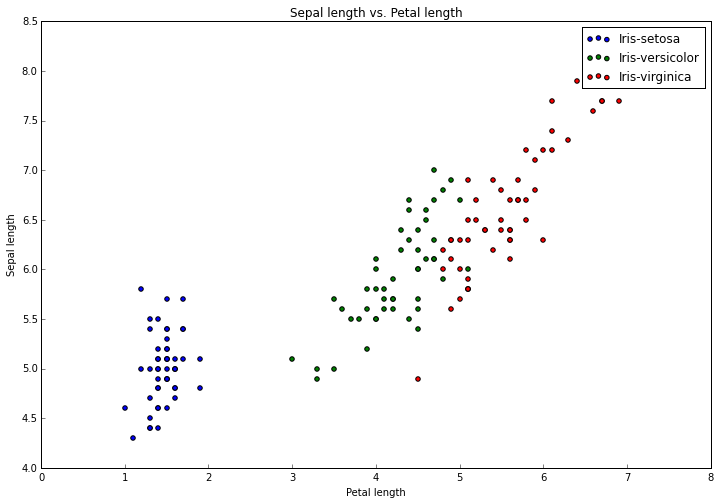

In [59]:
scatter_plotter_3group(flowers,'Petal length','Sepal length', 'Iris-setosa','Iris-versicolor','Iris-virginica')

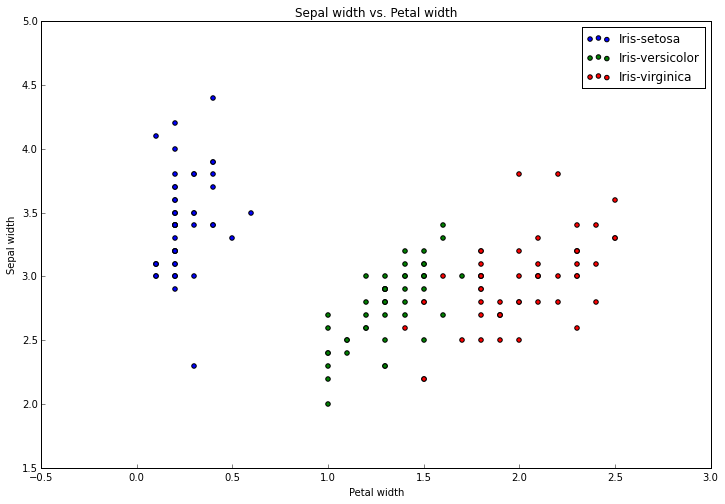

In [60]:
scatter_plotter_3group(flowers,'Petal width','Sepal width', 'Iris-setosa','Iris-versicolor','Iris-virginica')

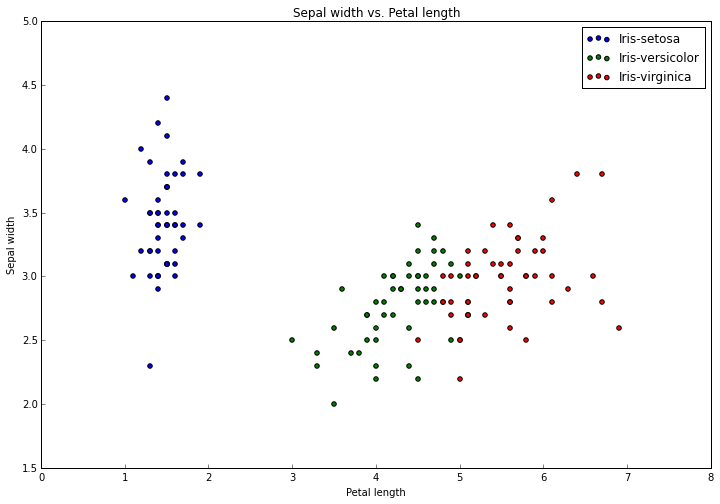

In [61]:
scatter_plotter_3group(flowers,'Petal length','Sepal width', 'Iris-setosa','Iris-versicolor','Iris-virginica')

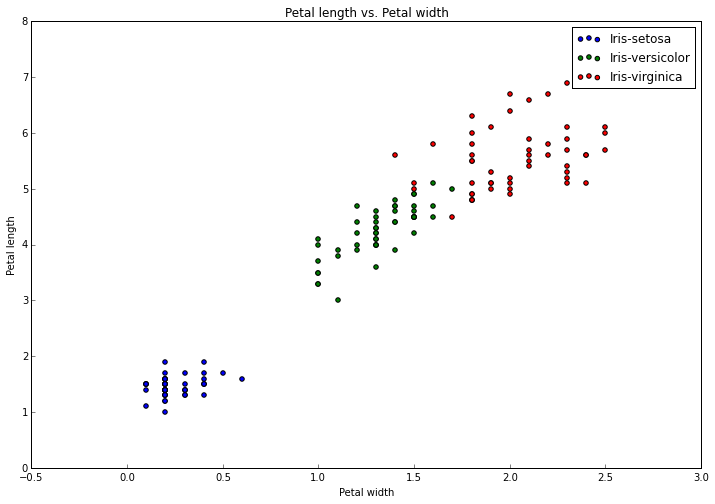

In [62]:
scatter_plotter_3group(flowers,'Petal width','Petal length', 'Iris-setosa','Iris-versicolor','Iris-virginica')

In [63]:
def getLabels(data,centroid,attribute1, attribute2):
            distance1=pow((data[i,attribute1]-centroid[0,attribute1]),2)+pow((data[i,attribute2]-centroid[0,attribute2]),2)
            distance2=pow((data[i,attribute1]-centroid[1,attribute1]),2)+pow((data[i,attribute2]-centroid[1,attribute2]),2)
            distance3=pow((data[i,attribute1]-centroid[2,attribute1]),2)+pow((data[i,attribute2]-centroid[2,attribute2]),2)
            return min(distance1,distance2,distance3)

In [64]:
def k_means_plotter_by_cluster(data_set,attribute1,attribute2,number_clusters, rangebool):
        kmeans = cluster.KMeans(n_clusters=number_clusters)
        if rangebool:
            numericdata= data_set.loc[:, attribute1 : attribute2]
        else:
            numericdata= data_set.loc[:,[attribute1, attribute2]]
        kmeans.fit(numericdata)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        data_set_array = numericdata.values
        for i in range(number_clusters):
            group = data_set_array[np.where(labels==i)]    
            line=plt.plot(group[:,0],group[:,1],'o')    
            lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
            labels=getLabels(data_set, centroids,attribute1, attribute2)
            plt.setp(lines,ms=15.0)
            plt.setp(lines,mew=2.0)
        if rangebool:
            plt.title('All 4 variables')
        else:
            plt.title(attribute2 + ' vs. ' + attribute1)
        plt.show()

In [65]:
def k_means_plotter_by_group(data_set,attribute1,attribute2,number_clusters, rangebool):
        kmeans = cluster.KMeans(n_clusters=number_clusters)
        if rangebool:
            numericdata= data_set.loc[:, attribute1 : attribute2]
        else:
            numericdata= data_set.loc[:,[attribute1, attribute2]]
        kmeans.fit(numericdata)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        data_set_array = numericdata.values
        for i in range(number_clusters):
            group = data_set_array[np.where(labels==i)]    
            line=plt.plot(group[:,0],group[:,1],'o')    
            lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
            plt.setp(lines,ms=15.0)
            plt.setp(lines,mew=2.0)
        graph1=plt.legend(line, labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
        if rangebool:
            plt.title('All 4 variables')
        else:
            plt.title(attribute2 + ' vs. ' + attribute1)
        
        plt.show()

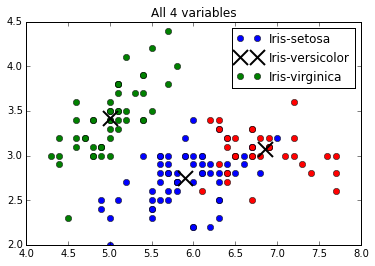

In [66]:
k_means_plotter_by_group(flowers, 'Sepal length', 'Petal width', 3, True)
#k_means_plotter_by_cluster(flowers, 'Sepal length', 'Petal width', 3, True)

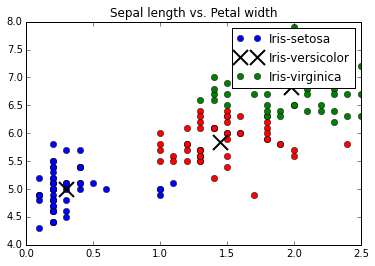

In [67]:
k_means_plotter_by_group(flowers, 'Petal width', 'Sepal length', 3,False)

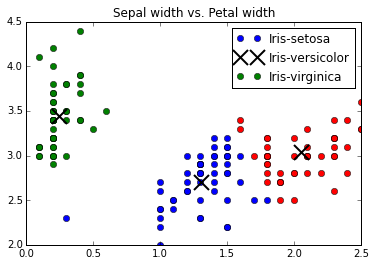

In [68]:
k_means_plotter_by_group(flowers, 'Petal width', 'Sepal width', 3, False)

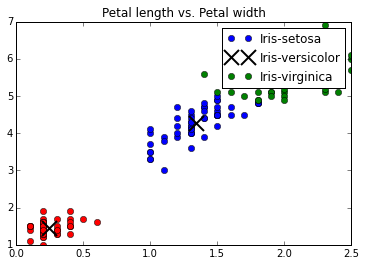

In [69]:
k_means_plotter_by_group(flowers, 'Petal width', 'Petal length', 3,False)

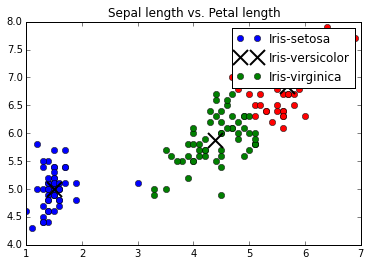

In [70]:
k_means_plotter_by_group(flowers, 'Petal length', 'Sepal length', 3,False)

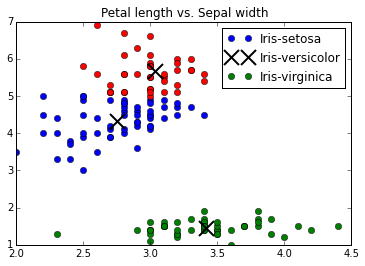

In [71]:
k_means_plotter_by_group(flowers, 'Sepal width', 'Petal length', 3,False)

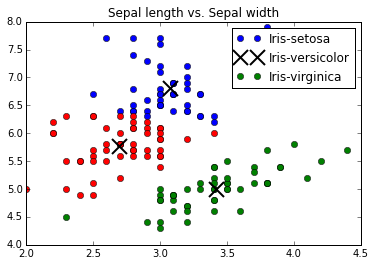

In [72]:
k_means_plotter_by_group(flowers, 'Sepal width', 'Sepal length', 3,False)